In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import zipfile

zip_file_path = 'dsb-24-german-credit.zip'

test_file_path = 'german_credit_test.csv'
train_file_path = 'german_credit_train.csv'
submission_file_path = 'german_credit_test_submission.csv'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(test_file_path) as csv_file:
        df_test = pd.read_csv(csv_file)
    with zip_ref.open(train_file_path) as csv_file:
        df_train = pd.read_csv(csv_file)
    with zip_ref.open(submission_file_path) as csv_file:
        df_submission = pd.read_csv(csv_file)

print(df_train.columns)

Index(['CheckingStatus', 'LoanDuration', 'CreditHistory', 'LoanPurpose',
       'LoanAmount', 'ExistingSavings', 'EmploymentDuration',
       'InstallmentPercent', 'Sex', 'OthersOnLoan', 'CurrentResidenceDuration',
       'OwnsProperty', 'Age', 'InstallmentPlans', 'Housing',
       'ExistingCreditsCount', 'Job', 'Dependents', 'Telephone',
       'ForeignWorker', 'Risk'],
      dtype='object')


In [16]:
df_train

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,greater_200,27,credits_paid_to_date,furniture,4650,less_100,1_to_4,3,male,none,...,savings_insurance,40,none,own,1,skilled,1,none,yes,No Risk
3995,0_to_200,11,prior_payments_delayed,furniture,250,greater_1000,4_to_7,3,male,none,...,car_other,32,bank,own,1,unemployed,1,none,yes,No Risk
3996,no_checking,32,outstanding_credit,appliances,6536,unknown,greater_7,5,male,co-applicant,...,unknown,54,stores,own,2,unskilled,2,yes,yes,Risk
3997,0_to_200,38,outstanding_credit,other,1597,500_to_1000,greater_7,3,female,co-applicant,...,savings_insurance,27,stores,own,1,skilled,1,none,yes,Risk


In [17]:
df_train.dtypes

CheckingStatus              object
LoanDuration                 int64
CreditHistory               object
LoanPurpose                 object
LoanAmount                   int64
ExistingSavings             object
EmploymentDuration          object
InstallmentPercent           int64
Sex                         object
OthersOnLoan                object
CurrentResidenceDuration     int64
OwnsProperty                object
Age                          int64
InstallmentPlans            object
Housing                     object
ExistingCreditsCount         int64
Job                         object
Dependents                   int64
Telephone                   object
ForeignWorker               object
Risk                        object
dtype: object

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# features_selection_1 = ["Sex"] pour l'instant on va juste passer en binaire

X = df_train.drop(columns=["Risk"]).copy()
y = df_train["Risk"].copy()

label_encoder = LabelEncoder()
label_encoder.fit(['No Risk', 'Risk'])
y = label_encoder.transform(y)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_train, y, test_size=0.1, random_state=42)

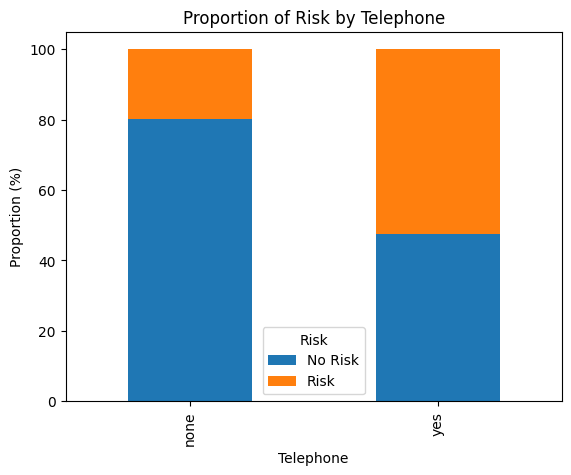

Telephone
none    2348
yes     1651
Name: count, dtype: int64


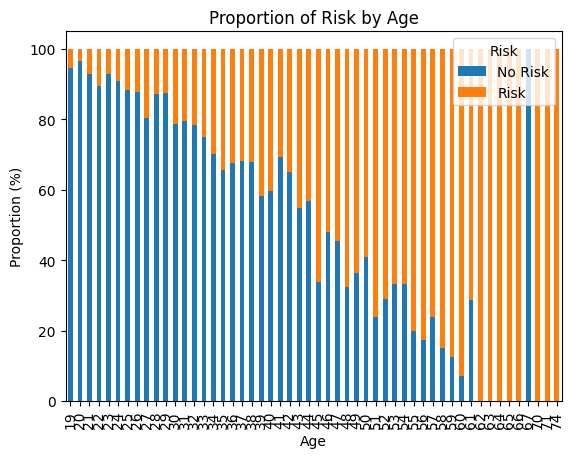

Age
19    343
36    155
40    141
33    136
41    133
28    132
34    131
37    129
39    129
42    123
31    123
32    120
38    118
43    115
45    115
30    113
29    112
44    109
35    108
46    102
27     97
47     97
26     90
24     89
25     86
49     77
22     76
48     74
23     71
50     71
51     63
20     61
21     56
52     55
53     45
54     42
55     35
56     23
57     21
58     20
59     16
60     14
61      7
65      5
62      4
64      4
63      4
66      3
70      3
67      1
71      1
74      1
Name: count, dtype: int64


In [19]:
def plot_criteria_proportions(df, criterion, target):
    # Calculer les proportions
    proportions = pd.crosstab(df[criterion], df[target], normalize='index') * 100

    # Tracer le graphique
    proportions.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Proportion of {target} by {criterion}')
    plt.xlabel(criterion)
    plt.ylabel('Proportion (%)')
    plt.legend(title=target)
    plt.show()

    print(df[criterion].value_counts())

# Exemple d'utilisation de la fonction
plot_criteria_proportions(df_train, 'Telephone', 'Risk')
plot_criteria_proportions(df_train, 'Age', 'Risk')

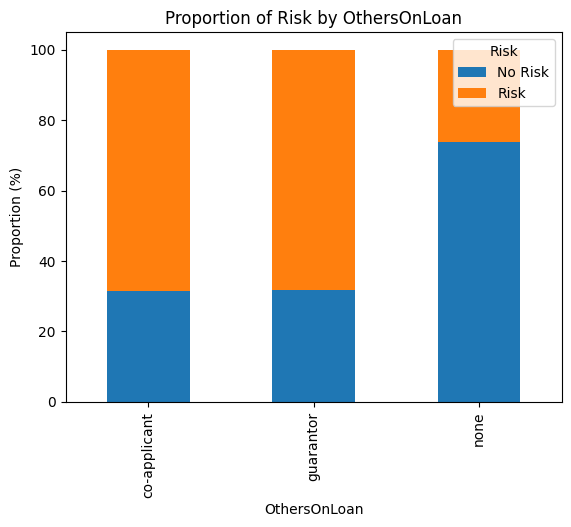

OthersOnLoan
none            3334
co-applicant     580
guarantor         85
Name: count, dtype: int64


In [20]:
plot_criteria_proportions(df_train, 'OthersOnLoan', 'Risk')

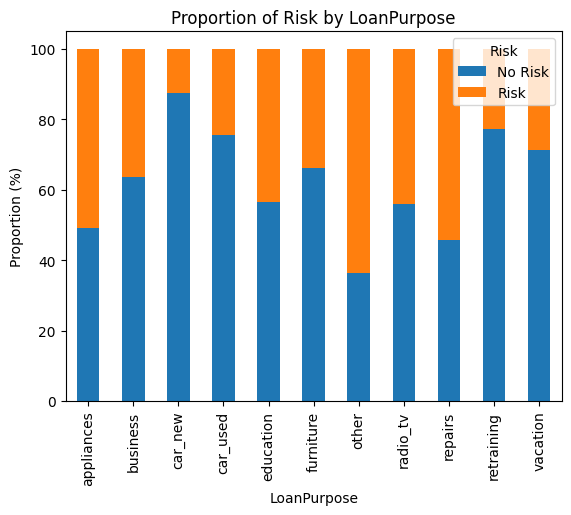

LoanPurpose
car_new       769
furniture     688
car_used      640
radio_tv      601
appliances    446
repairs       219
vacation      164
retraining    132
education     131
business      118
other          91
Name: count, dtype: int64


In [21]:
plot_criteria_proportions(df_train, 'LoanPurpose', 'Risk')

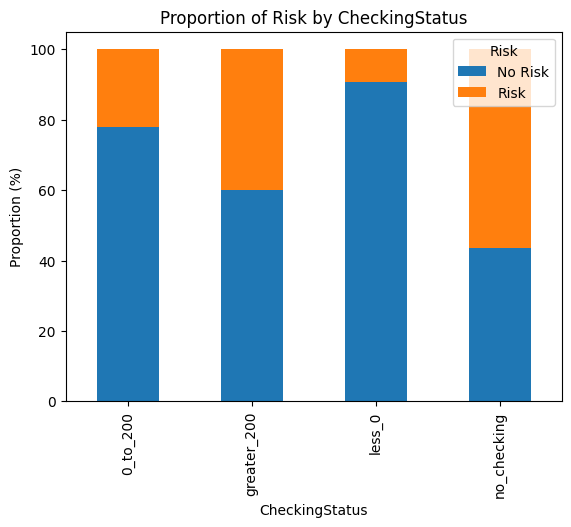

CheckingStatus
no_checking    1590
less_0         1127
0_to_200       1036
greater_200     246
Name: count, dtype: int64


In [22]:
plot_criteria_proportions(df_train, 'CheckingStatus', 'Risk')

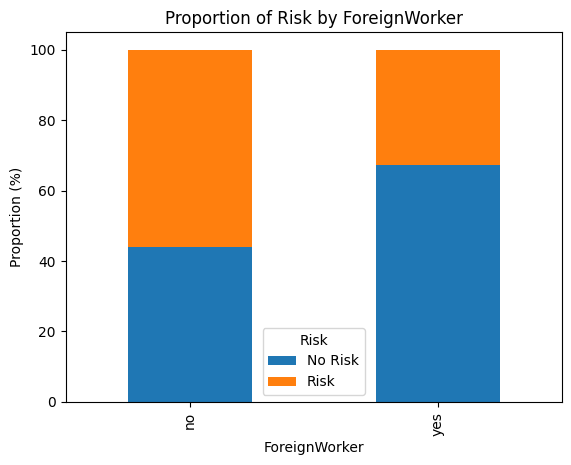

ForeignWorker
yes    3908
no       91
Name: count, dtype: int64


In [23]:
plot_criteria_proportions(df_train, 'ForeignWorker', 'Risk')

# We will drop this feature due to the large class imbalance

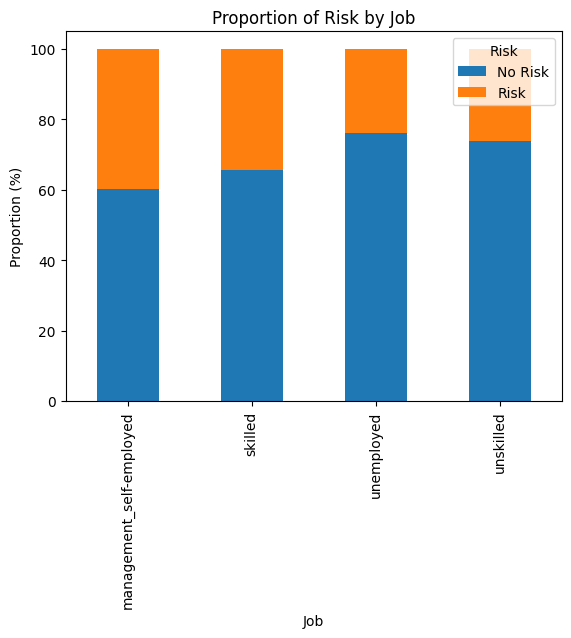

Job
skilled                     2726
unskilled                    535
management_self-employed     507
unemployed                   231
Name: count, dtype: int64


In [24]:
plot_criteria_proportions(df_train, 'Job', 'Risk')

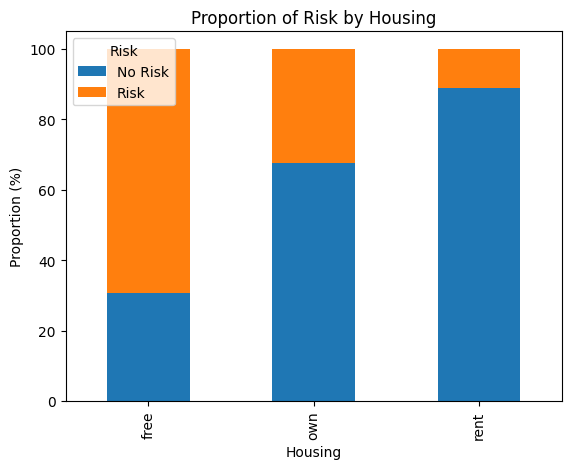

Housing
own     2554
rent     860
free     585
Name: count, dtype: int64


In [25]:
plot_criteria_proportions(df_train, 'Housing', 'Risk')


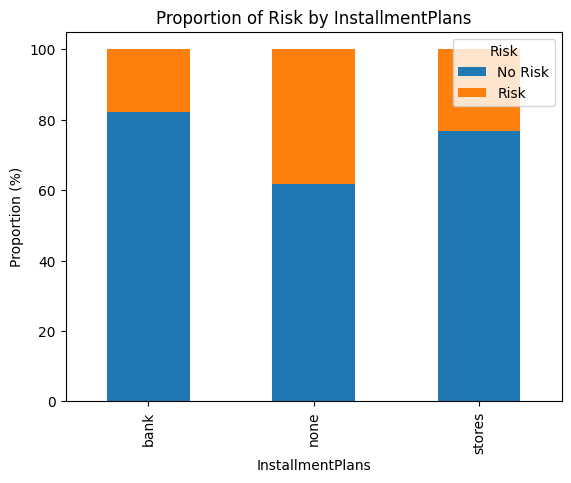

InstallmentPlans
none      2807
stores     820
bank       372
Name: count, dtype: int64


In [26]:
plot_criteria_proportions(df_train, 'InstallmentPlans', 'Risk')

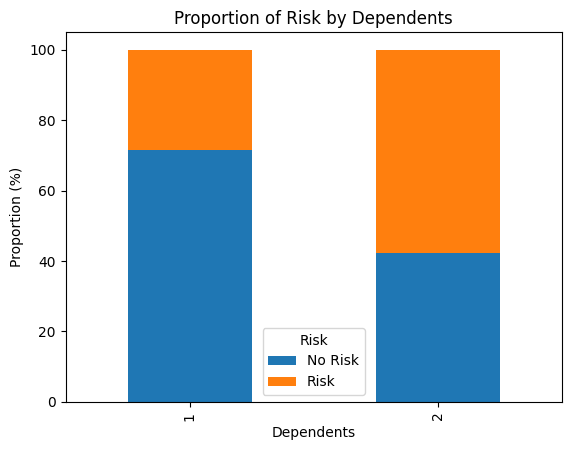

Dependents
1    3345
2     654
Name: count, dtype: int64


In [27]:
plot_criteria_proportions(df_train, 'Dependents', 'Risk')

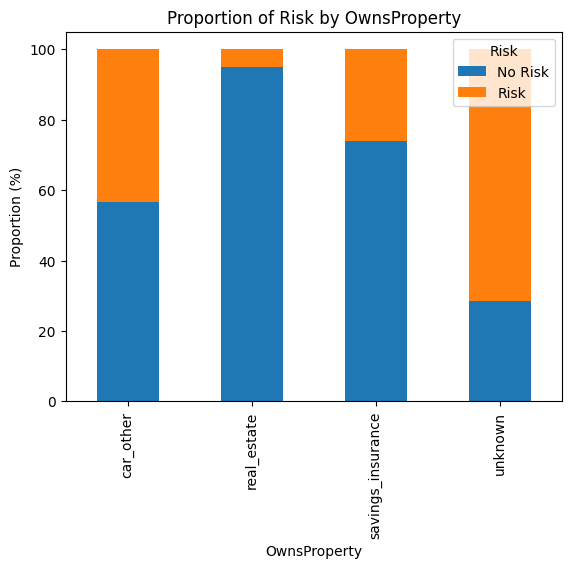

OwnsProperty
savings_insurance    1332
car_other            1228
real_estate           872
unknown               567
Name: count, dtype: int64


In [28]:
plot_criteria_proportions(df_train, 'OwnsProperty', 'Risk')

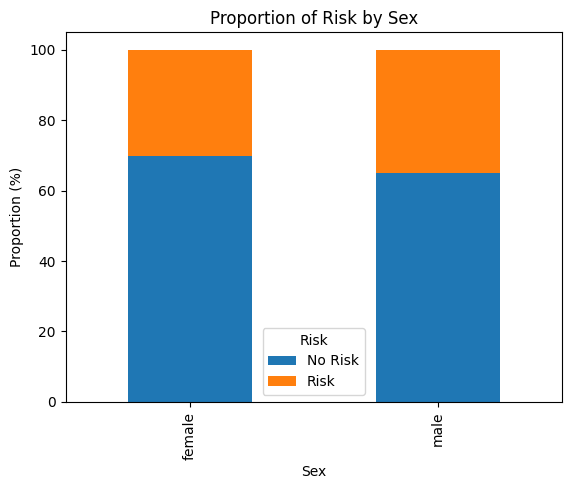

Sex
male      2480
female    1519
Name: count, dtype: int64


In [29]:
plot_criteria_proportions(df_train, 'Sex', 'Risk')

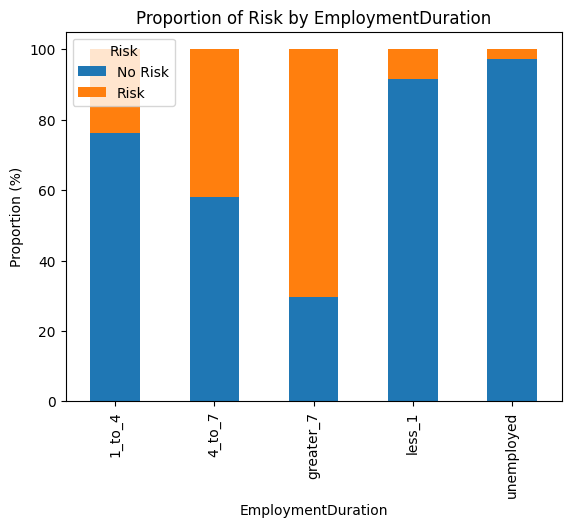

EmploymentDuration
1_to_4        1150
4_to_7        1112
less_1         756
greater_7      738
unemployed     243
Name: count, dtype: int64


In [30]:
plot_criteria_proportions(df_train, 'EmploymentDuration', 'Risk')

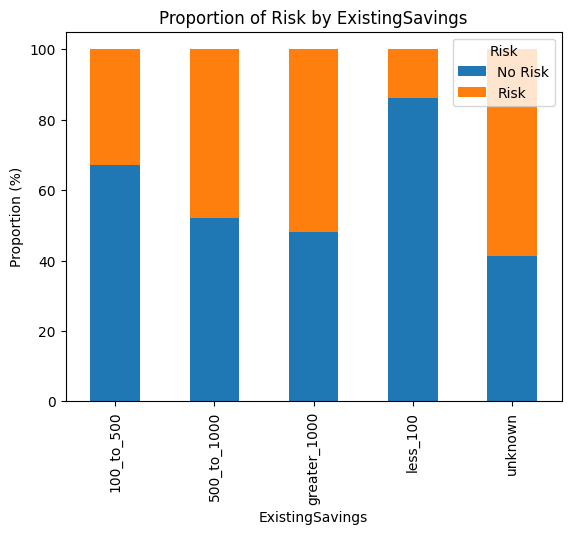

ExistingSavings
less_100        1485
100_to_500       883
500_to_1000      877
greater_1000     453
unknown          301
Name: count, dtype: int64


In [31]:
plot_criteria_proportions(df_train, 'ExistingSavings', 'Risk')

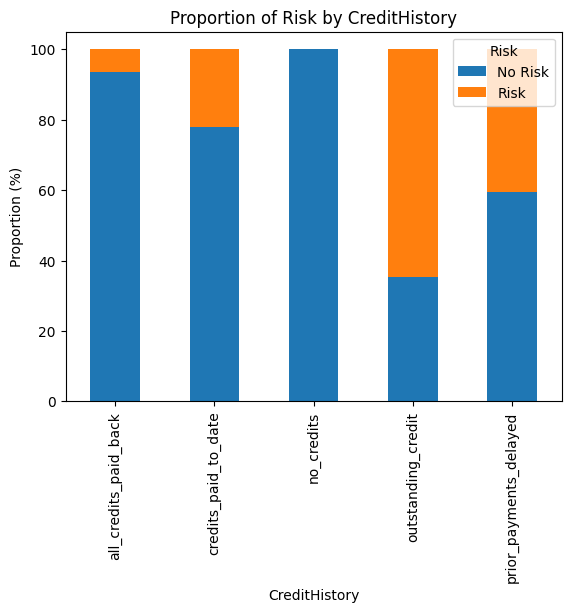

CreditHistory
prior_payments_delayed    1355
credits_paid_to_date      1182
outstanding_credit         745
all_credits_paid_back      617
no_credits                 100
Name: count, dtype: int64


In [32]:
plot_criteria_proportions(df_train, 'CreditHistory', 'Risk')

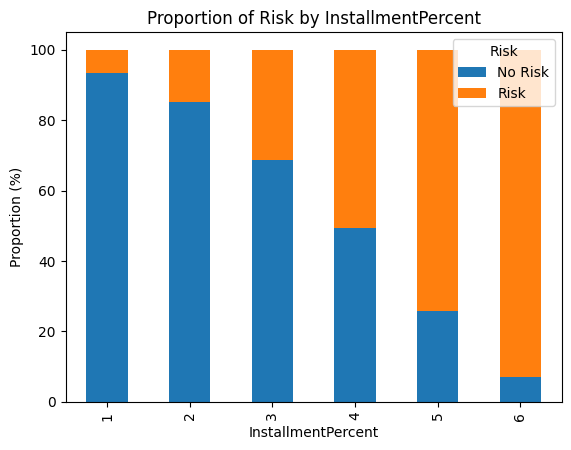

InstallmentPercent
3    1285
4     975
2     958
1     430
5     337
6      14
Name: count, dtype: int64


In [33]:
plot_criteria_proportions(df_train, 'InstallmentPercent', 'Risk')

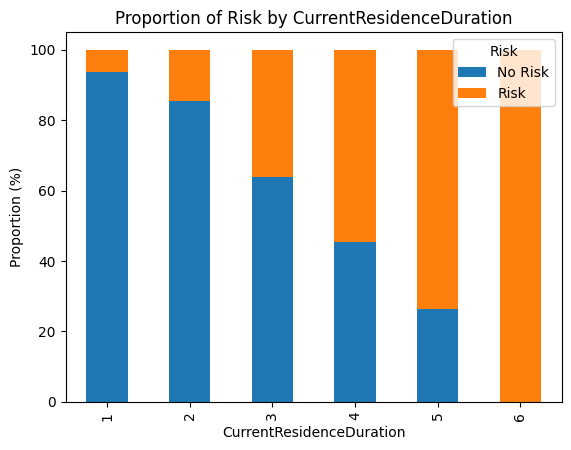

CurrentResidenceDuration
3    1326
2    1019
4     858
1     520
5     273
6       3
Name: count, dtype: int64


In [34]:
plot_criteria_proportions(df_train, 'CurrentResidenceDuration', 'Risk')

In [35]:
def plot_scatter_num(df, criterion1, criterion2):

    colors = df_train['Risk'].apply(lambda x: 'red' if x == 'Risk' else 'blue')

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df_train[criterion1], df_train[criterion2], c=colors, alpha=0.6, edgecolors='w', s=100)

    handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Risk'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Risk')
    ]
    plt.legend(title='Risk', handles=handles)

    plt.xlabel(criterion1)
    plt.ylabel(criterion2)
    plt.title(f'Scatter Plot of {criterion1} vs {criterion2}')

    plt.show()

In [37]:
y_train_1.sum(), len(y_train_1)

(np.int64(1181), 3599)

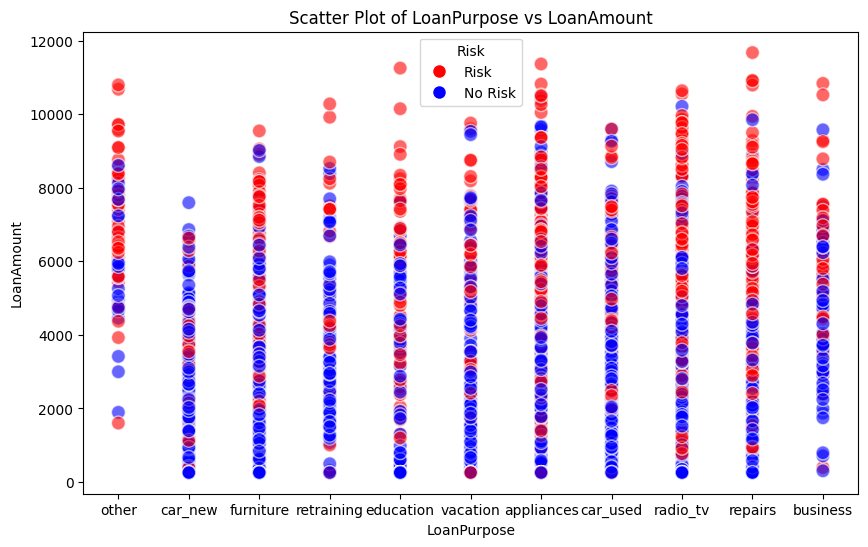

In [38]:
plot_scatter_num(df_train, 'LoanPurpose', 'LoanAmount')

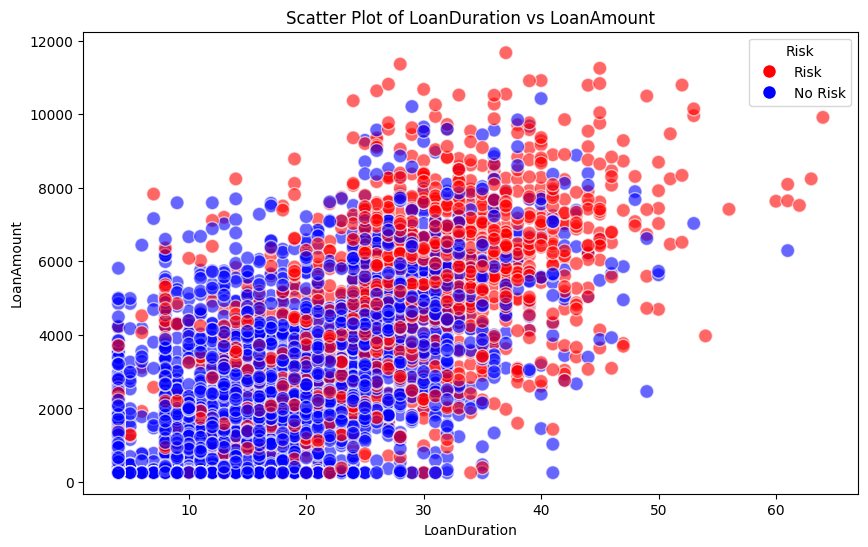

In [39]:
plot_scatter_num(df_train, 'LoanDuration', 'LoanAmount')


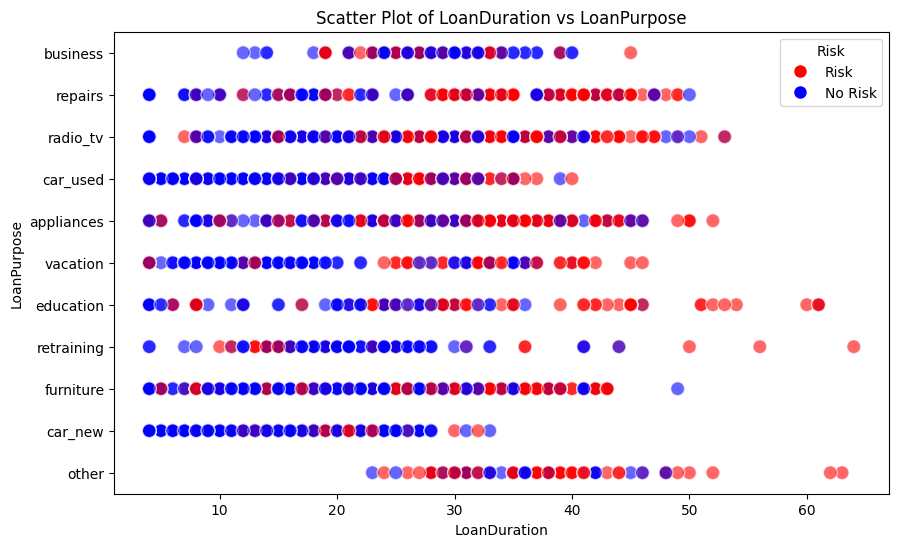

In [40]:
plot_scatter_num(df_train, 'LoanDuration', 'LoanPurpose')

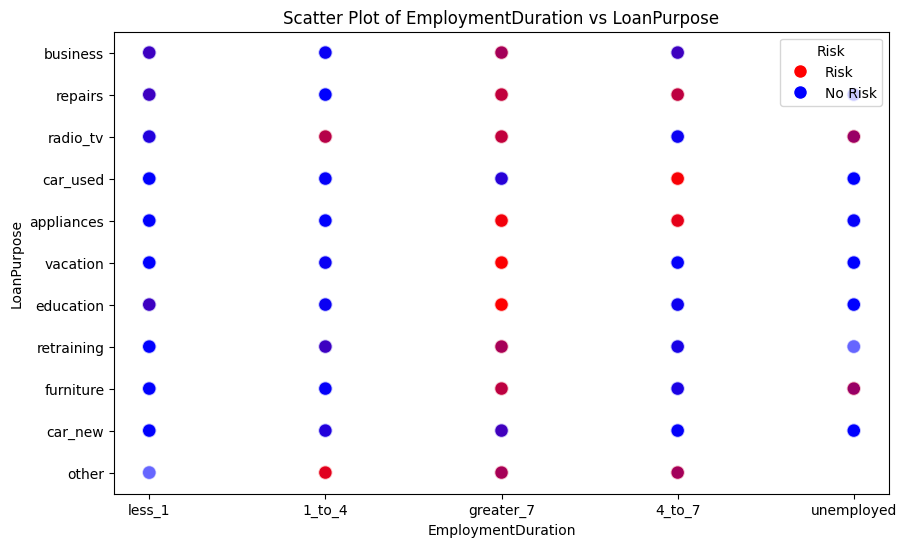

In [41]:
plot_scatter_num(df_train, 'EmploymentDuration', 'LoanPurpose')

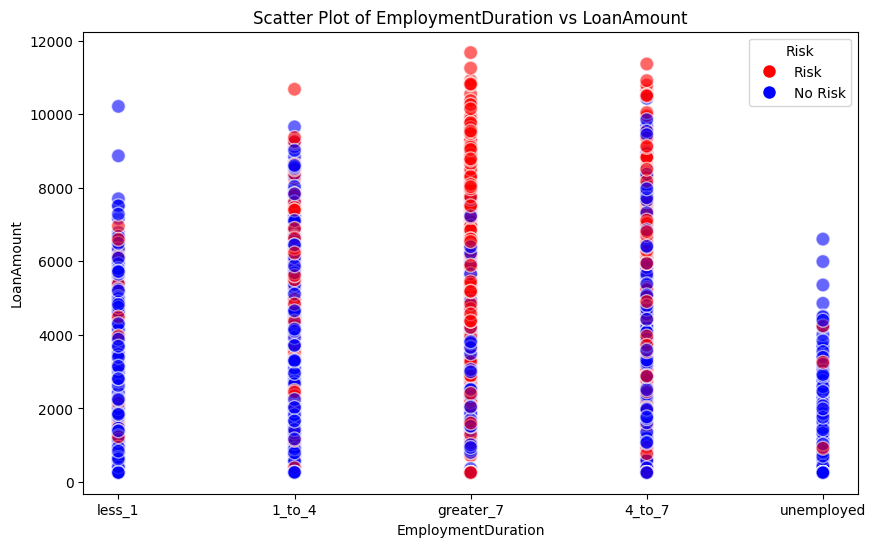

In [42]:
plot_scatter_num(df_train, 'EmploymentDuration', 'LoanAmount')

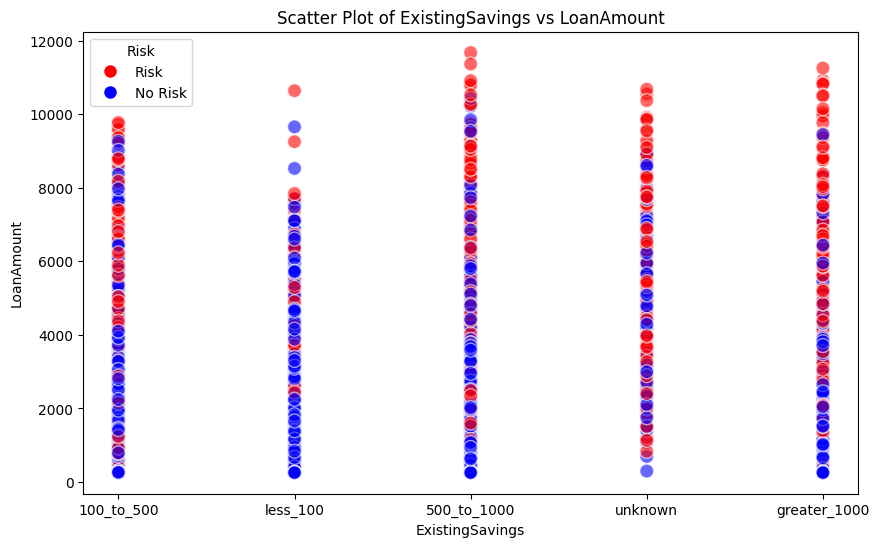

In [43]:
plot_scatter_num(df_train, 'ExistingSavings', 'LoanAmount')

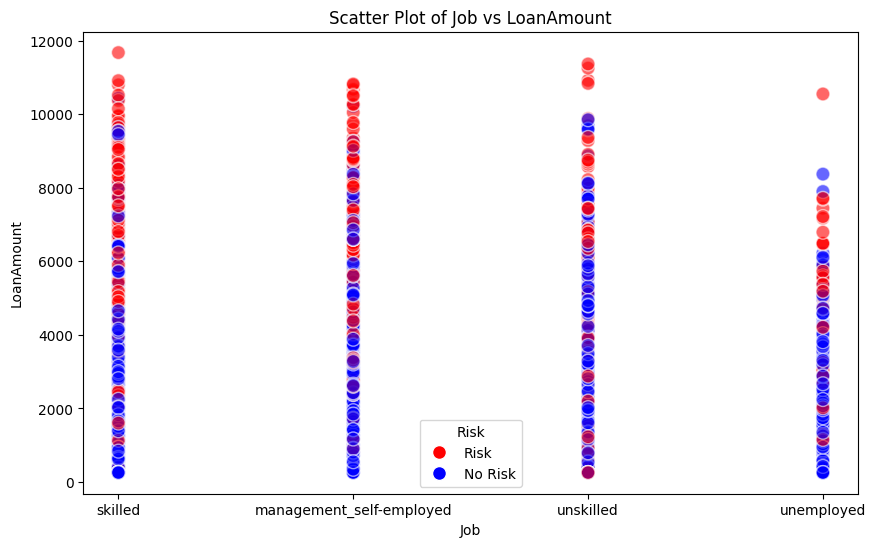

In [44]:
plot_scatter_num(df_train, 'Job', 'LoanAmount')

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# features_selection_1 = ["Sex"] pour l'instant on va juste passer en binaire

X = df_train.drop(columns=["Risk"]).copy()
y = df_train["Risk"].copy()

# X = X.drop(columns=features_selection_1)

encoding = [col for col in X.columns if not pd.api.types.is_integer_dtype(X[col])]
# encoding.append('Dependents')

X_encoded = pd.get_dummies(X[encoding])
X_encoded = pd.concat([X.drop(columns=encoding), X_encoded], axis=1)
X_encoded['Dependents_Encoded'] = X_encoded['Dependents'].apply(lambda x: x == 2)

features_selection_2 = ['Telephone_yes', 'ForeignWorker_no', 'ForeignWorker_yes', 'Sex_female', 'Dependents',
                        'CheckingStatus_less_0', 'Housing_rent', 'EmploymentDuration_unemployed',
                        'OwnsProperty_real_estate', 'OthersOnLoan_none', 'CreditHistory_no_credits',
                        'ExistingSavings_less_100']

X_encoded = X_encoded.drop(columns=features_selection_2)

label_encoder = LabelEncoder()
label_encoder.fit(['No Risk', 'Risk'])
y = label_encoder.transform(y)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=42)

from imblearn.over_sampling import SMOTE

# Appliquer SMOTE pour rééquilibrer les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [47]:
X_encoded.columns

Index(['LoanDuration', 'LoanAmount', 'InstallmentPercent',
       'CurrentResidenceDuration', 'Age', 'ExistingCreditsCount',
       'CheckingStatus_0_to_200', 'CheckingStatus_greater_200',
       'CheckingStatus_no_checking', 'CreditHistory_all_credits_paid_back',
       'CreditHistory_credits_paid_to_date',
       'CreditHistory_outstanding_credit',
       'CreditHistory_prior_payments_delayed', 'LoanPurpose_appliances',
       'LoanPurpose_business', 'LoanPurpose_car_new', 'LoanPurpose_car_used',
       'LoanPurpose_education', 'LoanPurpose_furniture', 'LoanPurpose_other',
       'LoanPurpose_radio_tv', 'LoanPurpose_repairs', 'LoanPurpose_retraining',
       'LoanPurpose_vacation', 'ExistingSavings_100_to_500',
       'ExistingSavings_500_to_1000', 'ExistingSavings_greater_1000',
       'ExistingSavings_unknown', 'EmploymentDuration_1_to_4',
       'EmploymentDuration_4_to_7', 'EmploymentDuration_greater_7',
       'EmploymentDuration_less_1', 'Sex_male', 'OthersOnLoan_co-applicant',

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=2566, learning_rate=0.0007321603028731174)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy}')

# Feature importance
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

print("\nTop 10 important features:")
print(feature_importance_df.head(10))

Accuracy : 0.785

Top 10 important features:
                         feature  importance
8     CheckingStatus_no_checking    0.368690
30  EmploymentDuration_greater_7    0.091963
37          OwnsProperty_unknown    0.056506
3       CurrentResidenceDuration    0.036390
29     EmploymentDuration_4_to_7    0.029912
5           ExistingCreditsCount    0.026538
4                            Age    0.023661
33     OthersOnLoan_co-applicant    0.021679
32                      Sex_male    0.021285
0                   LoanDuration    0.020607


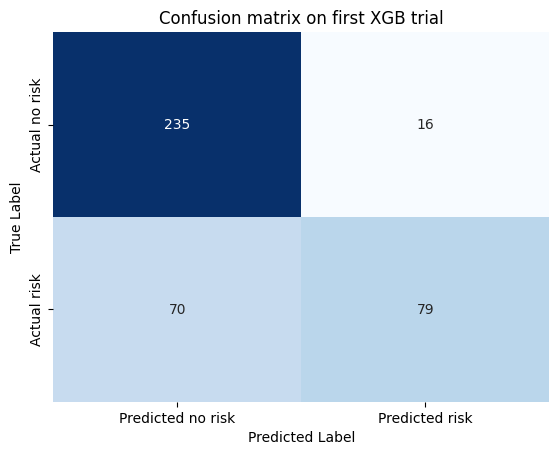

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted no risk', 'Predicted risk'],
            yticklabels=['Actual no risk', 'Actual risk'])

plt.title('Confusion matrix on first XGB trial')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_criteria_proportions_v2(df, criterion, true_label, predicted_label):
    # Calculer les proportions pour le vrai label
    proportions_true = pd.crosstab(df[criterion], df[true_label], normalize='index') * 100

    # Calculer les proportions pour le label prédit
    proportions_predicted = pd.crosstab(df[criterion], df[predicted_label], normalize='index') * 100

    # Créer une figure avec deux sous-graphiques
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Tracer le graphique pour le vrai label
    proportions_true.plot(kind='bar', stacked=True, ax=axes[0])
    axes[0].set_title(f'Proportion of {true_label} by {criterion}')
    axes[0].set_xlabel(criterion)
    axes[0].set_ylabel('Proportion (%)')
    axes[0].legend(title=true_label)

    # Tracer le graphique pour le label prédit
    proportions_predicted.plot(kind='bar', stacked=True, ax=axes[1])
    axes[1].set_title(f'Proportion of {predicted_label} by {criterion}')
    axes[1].set_xlabel(criterion)
    axes[1].legend(title=predicted_label)

    plt.tight_layout()
    plt.show()

    # Afficher les comptages de la colonne criterion
    print(df[criterion].value_counts())


In [53]:
X_analysis = X_test_1.copy()

X_analysis['Risk_pred'] = y_pred
X_analysis['Risk_label'] = y_test_1

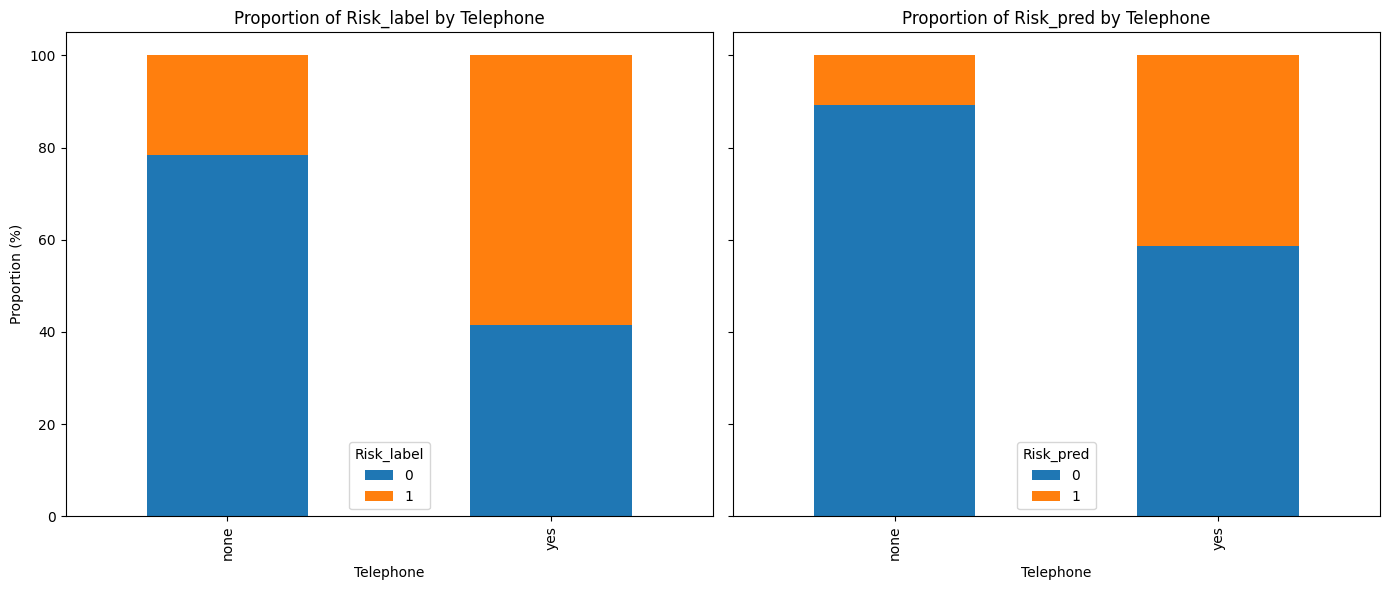

Telephone
none    231
yes     169
Name: count, dtype: int64


In [54]:
plot_criteria_proportions_v2(X_analysis, 'Telephone', 'Risk_label', 'Risk_pred')

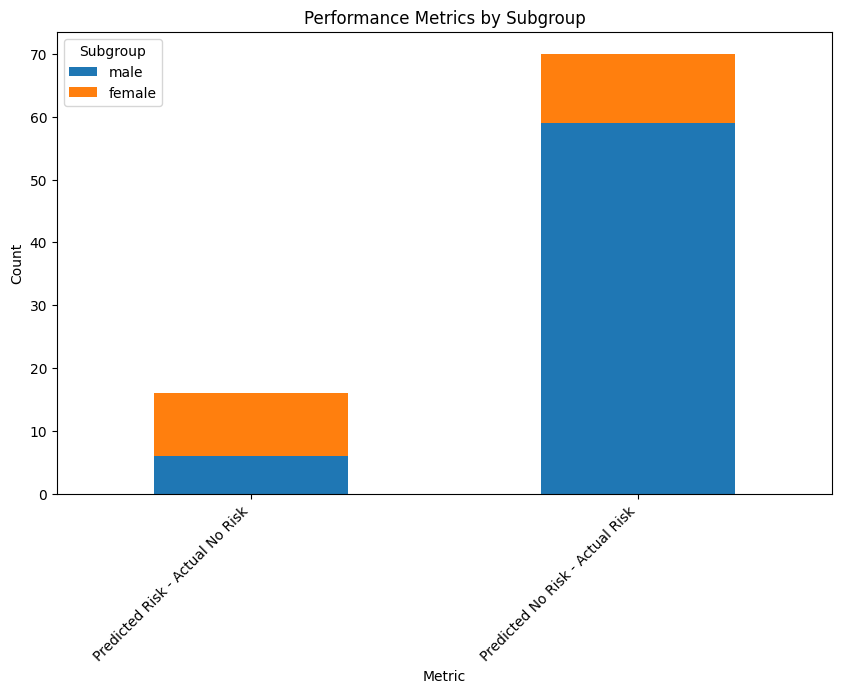

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_metrics(df, criterion, true_label, predicted_label):
    # Calculer les métriques pour chaque sous-groupe
    metrics = pd.DataFrame(index=['Predicted Risk - Actual No Risk', 'Predicted No Risk - Actual Risk'])

    for value in df[criterion].unique():
        subset = df[df[criterion] == value]
        fp = ((subset[true_label] == 0) & (subset[predicted_label] == 1)).sum()
        fn = ((subset[true_label] == 1) & (subset[predicted_label] == 0)).sum()

        metrics[value] = [fp, fn]

    return metrics

def plot_metrics(metrics):
    # Tracer les métriques
    metrics.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Performance Metrics by Subgroup')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Metric')
    plt.ylabel('Count')
    plt.legend(title='Subgroup')
    plt.show()

# Exemple d'utilisation
metrics = calculate_metrics(X_analysis, 'Sex', 'Risk_label', 'Risk_pred')
plot_metrics(metrics)

import optuna

# Définir la fonction objectif pour Optuna
def objective(trial):
    # Définir les hyperparamètres à optimiser
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'n_estimators': trial.suggest_int('n_estimators', 800, 5000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-8, 1e-2)
    }

    # Créer le modèle XGBoost avec les hyperparamètres suggérés
    model = xgb.XGBClassifier(**param)

    # Entraîner le modèle
    model.fit(X_train_scaled, y_train_resampled)

    # Prédire sur l'ensemble de test
    y_pred = model.predict(X_test_scaled)

    # Calculer la précision
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Créer un étude Optuna et optimiser
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", study.best_params)
print("Meilleure précision : ", study.best_value)

study.best_params

In [57]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train_1, y_train_1, cv=5, scoring='accuracy')

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/paul/.global_envs/jupyter-global-3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/paul/.global_envs/jupyter-global-3.9/lib/python3.9/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/Users/paul/.global_envs/jupyter-global-3.9/lib/python3.9/site-packages/xgboost/sklearn.py", line 1580, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "/Users/paul/.global_envs/jupyter-global-3.9/lib/python3.9/site-packages/xgboost/sklearn.py", line 603, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
  File "/Users/paul/.global_envs/jupyter-global-3.9/lib/python3.9/site-packages/xgboost/sklearn.py", line 1065, in _create_dmatrix
    return QuantileDMatrix(
  File "/Users/paul/.global_envs/jupyter-global-3.9/lib/python3.9/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/Users/paul/.global_envs/jupyter-global-3.9/lib/python3.9/site-packages/xgboost/core.py", line 1573, in __init__
    self._init(
  File "/Users/paul/.global_envs/jupyter-global-3.9/lib/python3.9/site-packages/xgboost/core.py", line 1632, in _init
    it.reraise()
  File "/Users/paul/.global_envs/jupyter-global-3.9/lib/python3.9/site-packages/xgboost/core.py", line 569, in reraise
    raise exc  # pylint: disable=raising-bad-type
  File "/Users/paul/.global_envs/jupyter-global-3.9/lib/python3.9/site-packages/xgboost/core.py", line 550, in _handle_exception
    return fn()
  File "/Users/paul/.global_envs/jupyter-global-3.9/lib/python3.9/site-packages/xgboost/core.py", line 637, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
  File "/Users/paul/.global_envs/jupyter-global-3.9/lib/python3.9/site-packages/xgboost/data.py", line 1402, in next
    input_data(**self.kwargs)
  File "/Users/paul/.global_envs/jupyter-global-3.9/lib/python3.9/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/Users/paul/.global_envs/jupyter-global-3.9/lib/python3.9/site-packages/xgboost/core.py", line 617, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
  File "/Users/paul/.global_envs/jupyter-global-3.9/lib/python3.9/site-packages/xgboost/data.py", line 1447, in _proxy_transform
    df, feature_names, feature_types = _transform_pandas_df(
  File "/Users/paul/.global_envs/jupyter-global-3.9/lib/python3.9/site-packages/xgboost/data.py", line 603, in _transform_pandas_df
    pandas_check_dtypes(data, enable_categorical)
  File "/Users/paul/.global_envs/jupyter-global-3.9/lib/python3.9/site-packages/xgboost/data.py", line 569, in pandas_check_dtypes
    _invalid_dataframe_dtype(data)
  File "/Users/paul/.global_envs/jupyter-global-3.9/lib/python3.9/site-packages/xgboost/data.py", line 356, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:CheckingStatus: object, CreditHistory: object, LoanPurpose: object, ExistingSavings: object, EmploymentDuration: object, Sex: object, OthersOnLoan: object, OwnsProperty: object, InstallmentPlans: object, Housing: object, Job: object, Telephone: object, ForeignWorker: object, Risk: object


from sklearn.model_selection import learning_curve
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.2, 1, 5), cv=5)

plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [ ]:
X_scaled = scaler.fit_transform(X_encoded)

clf = RandomForestClassifier(n_estimators=285, max_depth=25, min_samples_split=18, min_samples_leaf=11,
                             max_features='sqrt', bootstrap=False, random_state=42)
clf.fit(X_scaled, y)

RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_leaf=11,
                       min_samples_split=18, n_estimators=285, random_state=42)

In [ ]:
df_submit = df_test[["Id"]].copy()
df_test.drop(columns=["Id"], inplace=True)

In [ ]:
df_test_encoded = pd.get_dummies(df_test[encoding])
X_submission = pd.concat([df_test.drop(columns=encoding), df_test_encoded], axis=1)
X_submission['Dependents_Encoded'] = X_submission['Dependents'].apply(lambda x: x == 2)
X_submission.drop(columns=features_selection_2, inplace=True)
X_submission_scaled = scaler.transform(X_submission)

In [ ]:
y_pred = clf.predict(X_submission_scaled)

In [ ]:
y_pred.sum()

237

In [ ]:
df_submit['Risk'] = np.where(y_pred == 1, 'Risk', 'No Risk')

In [ ]:
# Enregistrer le DataFrame en fichier CSV
df_submit.to_csv('predictions_result_9.csv', index=False)

print("Fichier CSV enregistré avec succès.")

Fichier CSV enregistré avec succès.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=285, max_depth=25, min_samples_split=18, min_samples_leaf=11,
                             max_features='sqrt', bootstrap=False, random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy}')

# Feature importance
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

print("\nTop 10 important features:")
print(feature_importance_df.head(10))

Accuracy : 0.785

Top 10 important features:
                         feature  importance
1                     LoanAmount    0.122418
4                            Age    0.121762
8     CheckingStatus_no_checking    0.090243
0                   LoanDuration    0.085933
30  EmploymentDuration_greater_7    0.070279
3       CurrentResidenceDuration    0.064469
5           ExistingCreditsCount    0.056008
33     OthersOnLoan_co-applicant    0.042583
2             InstallmentPercent    0.037207
37          OwnsProperty_unknown    0.036166


In [ ]:
import optuna

def objective(trial):
    # Définir les hyperparamètres à optimiser
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 1, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])


    # Créer le modèle avec les hyperparamètres suggérés
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        n_jobs=-1,
        random_state=42
    )

    # Évaluer le modèle avec validation croisée
    score = cross_val_score(model, X_train_scaled, y_train, n_jobs=-1, cv=3)
    return score.mean()

# Créer une étude Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Afficher les meilleurs hyperparamètres
print("Best hyperparameters:", study.best_params)

[I 2025-02-27 01:11:30,901] A new study created in memory with name: no-name-3a44c52a-52b0-49fe-8b18-4363976cef24


[I 2025-02-27 01:11:40,945] Trial 0 finished with value: 0.8005006486887222 and parameters: {'n_estimators': 485, 'max_depth': 18, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.8005006486887222.
[I 2025-02-27 01:11:43,853] Trial 1 finished with value: 0.7843837457140209 and parameters: {'n_estimators': 437, 'max_depth': 4, 'min_samples_split': 13, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.8005006486887222.
[I 2025-02-27 01:11:44,514] Trial 2 finished with value: 0.7838274951348346 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.8005006486887222.
[I 2025-02-27 01:11:47,802] Trial 3 finished with value: 0.8024460198313409 and parameters: {'n_estimators': 152, 'max_depth': 27, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_feat

Best hyperparameters: {'n_estimators': 287, 'max_depth': 25, 'min_samples_split': 18, 'min_samples_leaf': 11, 'max_features': None, 'bootstrap': True}


In [9]:
import numpy as np

x = np.zeros((1000, 1)) + np.ones((1000, 1))
x.shape

(1000, 1)